In [3]:
from pathlib import Path


def read_log(logpath):
    loss = []
    acc = []
    losses = []
    for line in Path(logpath).read_text().split("\n"):
        if "Train losses: tensor(" in line:
            losses.append(eval(line.split("Train losses: tensor(")[1][:-1]))
        if "Train accuracy: " in line:
            loss.append(float(line.split("Train loss: ")[1].split("\t")[0]))
            acc.append(float(line.split("Train accuracy: ")[1]))
            if loss[-1]<4:
                loss[-1]*=2
    return loss

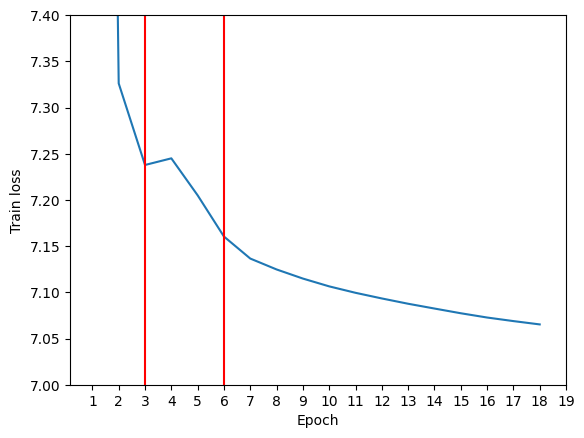

In [5]:
import matplotlib.pyplot as plt
# plt.plot(acc[:64*3])
# plt.show()

loss = read_log("../../checkpoints/kd_pretrain/tinybert/corpus_pretraining/log")
epoch = [i/64 for i in range(len(loss))]
loss_per_epoch = [sum(loss[i:i+64])/64 for i in range(0,len(loss),64)]
plt.plot(list(range(1,19)), loss_per_epoch)
plt.ylim([7,7.4])
plt.vlines([3,6],0,10,colors="r")
plt.xticks(range(1,20))
plt.xlabel("Epoch")
plt.ylabel("Train loss")
plt.show()